# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных 

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Откройте файл и изучите общую информацию

In [ ]:
import pandas as pd #Импортируем Pandas для работы с даннымит
import numpy as np #Импортируем Numpy в np
import matplotlib.pyplot as plt #импортируем matplotlib.pyplot для построения графиков
import seaborn as sbs #импорт сеаборн
from scipy import stats as st #импортируем scipy для проверк различным гипотез
pd.set_option('display.float_format', '{:,.2f}'.format) #для работы с округлением и экспоненциальными числами

In [ ]:
data = pd.read_csv("/datasets/games.csv") #открываем и записываем его в переменную data
data.head(10) #выведем первые 10 строк

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
data.info() #информация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Таким образом, мы прочитали нужный нам файл, открыли общую информацию о нем, в следующем пункте проведем подготовку данных, которая требуется в нашем случае, информация о назначении столбцов лежит в начале решения нашей задачи, пропустим это дублирование.

## Подготовка данных

### Замена названия столбцов

In [ ]:
data.columns = data.columns.str.lower() #примеяем к столбцам метод для нижнего регистра

In [ ]:
data.columns #проверка

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразуем типы данных 

In [ ]:
data["year_of_release"] = data["year_of_release"].astype("Int64") #поменяем на int64, чтобы обработать пропуски,
#так как этот тип способен хранить пропуски, а так же года имеет смысл хранить в целочисленном варианте
data["user_score"].value_counts() #изначально заменить не получилось, в связи с тем, что пропуски заменены на tbd

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.3       2
1.5       2
0.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [ ]:
#Оценка должна храниться не вещественном типе переменных
data["user_score"] = pd.to_numeric(data["user_score"], errors='coerce').astype("float64") 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Соотвестенно мы заранее уже изменили данное значение на пропуск.

In [ ]:
data["critic_score"].value_counts() #значения целые

70.00    256
71.00    254
75.00    245
78.00    240
73.00    238
        ... 
29.00      3
13.00      1
22.00      1
17.00      1
21.00      1
Name: critic_score, Length: 82, dtype: int64

In [ ]:
k = 0
for i in data["critic_score"]: #проверяем количесто вещественных чисел
    if (i % 1) == 0:
        k += 1
print(k)

8137


In [ ]:
data["critic_score"] = data["critic_score"].astype("Int64") # следовательно меняем значения на целочисленные

### Обработка пропусков

Перейдем к обработке пропусков, пропуски содержаться в таких столбцах как:
* name
* year_of_release
* genre
* critic_score
* user_score
* rating

In [ ]:
data["name"] = data["name"].fillna("no_name") #заполняем пропуски имени
#пропуск годов выпуска связан с незаполненностью данных, оставляем как есть
data["genre"] = data["genre"].fillna("no_genre") #будем толирантны, однако эти строчки можно было оставить как есть.


Все строчки, связанные с рейтингом оставим, как есть, потому что заполнение их может повлиять на статистику и на общие результаты исследования.

In [ ]:
data.query("year_of_release < 2005").isna().sum() #часть пропусков появилась из-за того, что рейтинг esbr появился в 2005

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       2836
user_score         3249
rating             2716
dtype: int64

Так же пропуски связаны с неправильной заполненностью данных, данные не были включены в датасет.

In [ ]:
data.isna().groupby("year_of_release").head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,True
183,False,False,True,False,False,False,False,False,False,False,False
377,False,False,True,False,False,False,False,False,False,False,False
456,False,False,True,False,False,False,False,False,False,False,False
475,False,False,True,False,False,False,False,False,True,True,True
609,False,False,True,False,False,False,False,False,True,True,True


In [ ]:
print('Количество игр с неизвестным годом релиза:', len(data.loc[data['year_of_release'].isna()]))
print('Процент игр с неизвестным годом релиза:', round(len(data[data['year_of_release'].isna()])/len(data)*100, 2), '%')

Количество игр с неизвестным годом релиза: 269
Процент игр с неизвестным годом релиза: 1.61 %


### Создание столбца, отвечащий за суммарные продажи

In [ ]:
data["sum_sales"] = data["na_sales"] + data["eu_sales"] + data["other_sales"] + data["jp_sales"] #суммируем значения столбцов
data["sum_sales"].head() #проверяем

0   82.54
1   40.24
2   35.52
3   32.77
4   31.38
Name: sum_sales, dtype: float64

Успешно! 
Таким образом, мы полнили предобработку данных, заполнили пропуски, там где это необходимо, изменили тип переменных для удобной работы, перевели названия столбцов в нижний регистр, посчитали суммарные продажи во всех регионах, записав их в отдельный столбец.

## Исследовательский анализ данных

### Количество игр в различные периоды времени

<AxesSubplot:xlabel='year_of_release'>

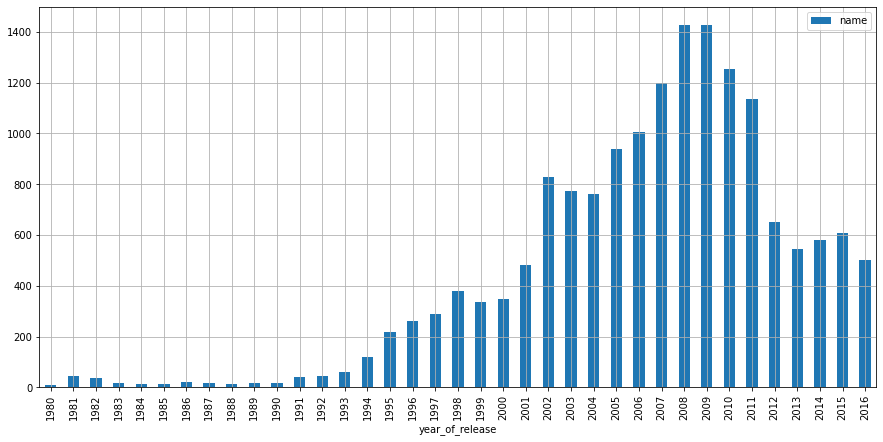

In [ ]:
games_of_yaers = data.pivot_table(index = "year_of_release", values = "name", aggfunc = "count" ) #создаем сводную таблицу
#будем искать количество выпускаем игр по столбцу с названиаем, так проще и мы можем отследить даты выпуска
games_of_yaers.plot(kind = "bar", grid = True, figsize = (15,7))

In [ ]:
data.query('year_of_release < 1993')["rating"].isna().sum() #пропусков достаточно много для такого количества игр

301

Как можно заменить, в период с 1980 по 1993 (примерно), количество игр было минимально, начиная с 1993 количество игр начало расти намного лучше, рост продолжался до 2008, оттуда с каждым годом количество падало, не считая 2015, где был небольшой скачок. Следовательно выборку уменьшим, будем считать игры с 1993 года.

In [ ]:
data = data.query("year_of_release >= 1993") #сделали срез и сохранили его в переменную

### Продажи по платформам

In [ ]:
platform_sales = data.pivot_table(index = "platform", values = "sum_sales", aggfunc = "sum") #сводная таблица с суммой продаж
platform_sales = platform_sales.sort_values(by = "sum_sales", ascending = False).head(5) #таблица продаж по убыванию
platform_sales

,sum_sales
platform,
PS2,"1,233.56"
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76


Топ 5 платформ с продажами за все время.

<AxesSubplot:xlabel='platform'>

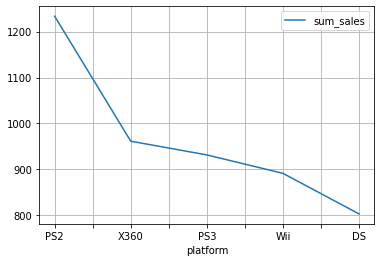

In [ ]:
platform_sales.plot(grid = True) #график для наглядности

In [ ]:
platform_sales_years = data.query('platform in ["PS2", "X360", "PS3", "Wii", "DS"]')
platform_sales_years = platform_sales_years.pivot_table(index = ["platform", "year_of_release"], values = "sum_sales", aggfunc ="sum")
platform_sales_years #продажи каждой платформы по годам.

sum_sales
platform year_of_release           
DS       2004                 17.27
         2005                130.14
         2006                119.81
         2007                146.94
         2008                145.31
         2009                119.54
         2010                 85.02
         2011                 26.18
         2012                 11.01
         2013                  1.54
PS2      2000                 39.17
         2001                166.43
         2002                205.38
         2003                184.31
         2004                211.81
         2005                160.66
         2006                103.42
         2007                 75.99
         2008                 53.90
         2009                 26.40
         2010                  5.64
         2011                  0.45
PS3      2006                 20.96
         2007                 73.19
         2008                118.52
         2009                130.93
         2010                142.17
         2011                156.78
         2012                107.36
         2013                113.25
         2014                 47.76
         2015                 16.82
         2016                  3.60
Wii      2006                137.15
         2007                152.77
         2008                171.32
         2009                206.97
         2010                127.95
         2011                 59.65
         2012                 21.71
         2013                  8.59
         2014                  3.75
         2015                  1.14
         2016                  0.18
X360     2005                  8.25
         2006                 51.62
         2007                 95.41
         2008                135.26
         2009                120.29
         2010                170.03
         2011                143.84
         2012                 99.74
         2013                 88.58
         2014                 34.74
         2015                 11.96
         2016                  1.52

In [ ]:
top_5 = ["PS2", "X360", "PS3", "Wii", "DS"]
x = []
for i in top_5:
    x.append(data.query("platform == @i")["year_of_release"].max() - data.query("platform == @i")["year_of_release"].min())
np.median(x) #среднее время жизни

10.0

Как мы можем заметить, пик для многих платформ приходится на 2009-2010 года. В дальнейшем происходит постепенное снижение. Следовательно в общей массе, средняя жизнь платформы 10 лет, так как к 10 годам продажи платформ снижаются к очень низкому показателю.

In [ ]:
data.query('year_of_release == 2016').groupby(['year_of_release', 'platform'])['sum_sales'].sum()

year_of_release  platform
2016             3DS        15.14
                 PC          5.25
                 PS3         3.60
                 PS4        69.25
                 PSV         4.25
                 Wii         0.18
                 WiiU        4.60
                 X360        1.52
                 XOne       26.15
Name: sum_sales, dtype: float64

Так в 2016, году уже умирает ps3, на ее смену приходит ps4.
Следовательно, следующий этап для гейминга ps4.

### Актуальные данные

Исходя из продаж сделаем вывод, что с 2012 года есть платформы, которые все еще имеют много продаж, однако молодые платформы набирают популярность, следовательно, считаю считать, что с 2012 года выборка актуальна, для дальнейшего прогноза.

In [ ]:
data = data.query('year_of_release >= 2012') #срез данных с 2012 года
data.groupby(['year_of_release', 'platform'])['sum_sales'].sum()

year_of_release  platform
2012             3DS         51.36
                 DS          11.01
                 PC          23.22
                 PS3        107.36
                 PSP          7.69
                 PSV         16.19
                 Wii         21.71
                 WiiU        17.56
                 X360        99.74
2013             3DS         56.57
                 DS           1.54
                 PC          12.38
                 PS3        113.25
                 PS4         25.99
                 PSP          3.14
                 PSV         10.59
                 Wii          8.59
                 WiiU        21.65
                 X360        88.58
                 XOne        18.96
2014             3DS         43.76
                 PC          13.28
                 PS3         47.76
                 PS4        100.00
                 PSP          0.24
                 PSV         11.90
                 Wii          3.75
                 WiiU        

### Какие платформы лидируют по продажам, растут или падают?

In [ ]:
data.query('year_of_release == 2016').groupby(['year_of_release', 'platform'])['sum_sales'].sum() #срез по 2016 году

year_of_release  platform
2016             3DS        15.14
                 PC          5.25
                 PS3         3.60
                 PS4        69.25
                 PSV         4.25
                 Wii         0.18
                 WiiU        4.60
                 X360        1.52
                 XOne       26.15
Name: sum_sales, dtype: float64

PS4, XOne - набирают уже обороты, следовательно они еще будут в последствии лидироваться на рынке, 3DS все еще на плову, однако в ближайшиие 2-3 года платформа будет стремительно терять продажи.

### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [ ]:
data_top_5 = data.query('@top_5 in platform') #создадим отдельный датасет
data_top_5["sum_sales"].describe() #числовое описание

count   870.00
mean      0.66
std       1.54
min       0.01
25%       0.06
50%       0.22
75%       0.68
max      21.05
Name: sum_sales, dtype: float64

Максимальное значение очень большое, считаю - это выброс, поэтому ограничимся выручкой в 2.0.

Text(0, 0.5, 'Продажи')

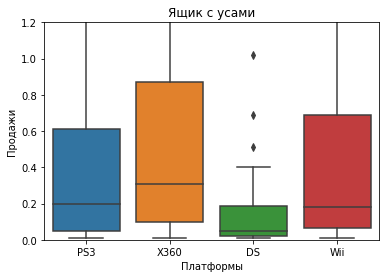

In [ ]:
sbs.boxplot(data=data_top_5, x='platform', y='sum_sales') #сеаборн + ящик с усами
plt.ylim([0, 1.2])
plt.title("Ящик с усами")
plt.xlabel("Платформы")
plt.ylabel("Продажи")

* Среднее значение у всех платформ различно, думаю - это связано с платежеспособностью аудиторий, на которые нацелены консоли
* Провели срез данных для отрисовки 
* Лидерство по продажаам : PS3, X360, Wii, PS2, DS.

### Влияние отзывов и рейтинга на продажи

In [ ]:
data_top_5.query('platform == "PS3"').user_score.corr(data_top_5["sum_sales"]) #кореляция оценки пользователей на продажи

-0.005143522887113829

In [ ]:
data_top_5["critic_score"] = data_top_5["critic_score"].astype("float") #по какой то неведомой ошибке, пришлось переименовать
#во float
data_top_5.query('platform == "PS3"')["critic_score"].corr(data_top_5["sum_sales"]) #кореляция оценки критиков на продажи

/tmp/ipykernel_36/1988019325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top_5["critic_score"] = data_top_5["critic_score"].astype("float") #по какой то неведомой ошибке, пришлось переименовать


0.3314972592629587

Text(0, 0.5, 'Продажи')

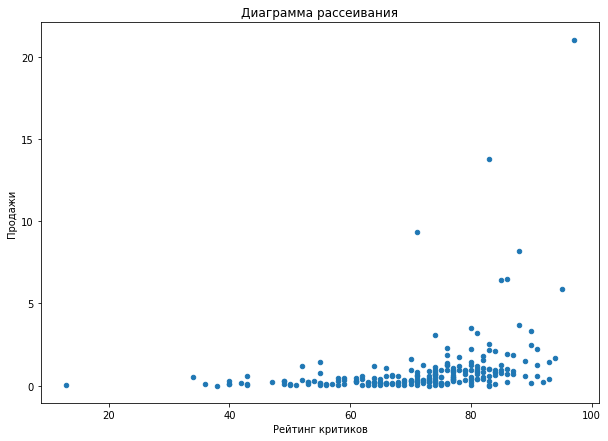

In [ ]:
data_top_5.query('platform == "PS3"').plot(x = "critic_score", y = "sum_sales", kind = "scatter", figsize = (10,7))
plt.title("Диаграмма рассеивания")
plt.xlabel("Рейтинг критиков")
plt.ylabel("Продажи")

Text(0, 0.5, 'Продажи')

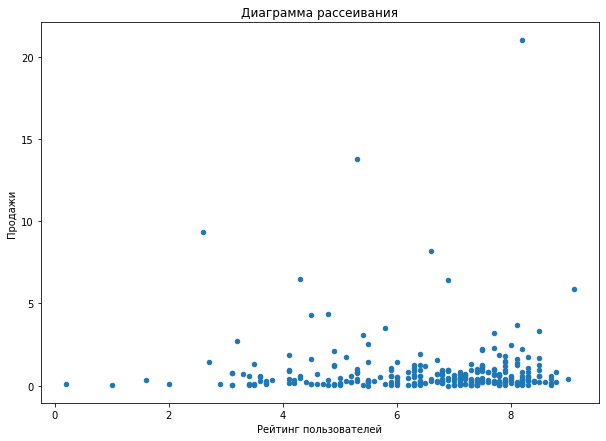

In [ ]:
data_top_5.query('platform == "PS3"').plot(x = "user_score", y = "sum_sales", kind = "scatter", figsize = (10,7))
plt.title("Диаграмма рассеивания")
plt.xlabel("Рейтинг пользователей")
plt.ylabel("Продажи")

Таким образом, рейтинг критиков, пользователей прямопорционально влияет на суммы продаж. Однако, оценка критика значимее, нежели оценка пользователя. Это применимо на примере PS3.



### Сравнение с другими платформами

In [ ]:
top_5 = ["PS3", "X360", "Wii", "PS2", "DS"]
corr = 0
def other_platform_matrix(name_of_platform):
    data_top_5.query('@i in platform').plot(x = "critic_score", y = "sum_sales", kind = "scatter", figsize = (10,7))
    plt.title(name_of_platform)
    data_top_5.query('@i in platform').plot(x = "user_score", y = "sum_sales", kind = "scatter", figsize = (10,7))
    plt.title(name_of_platform)


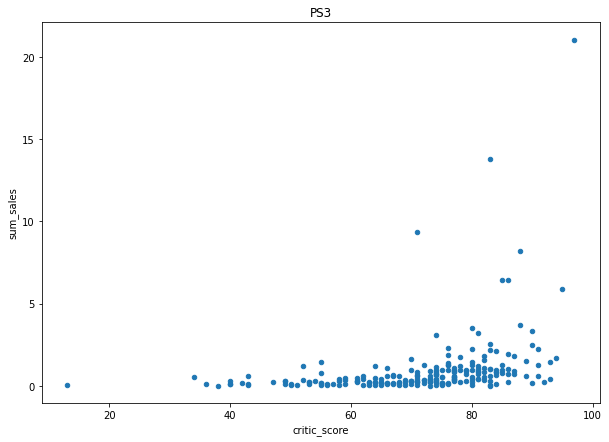

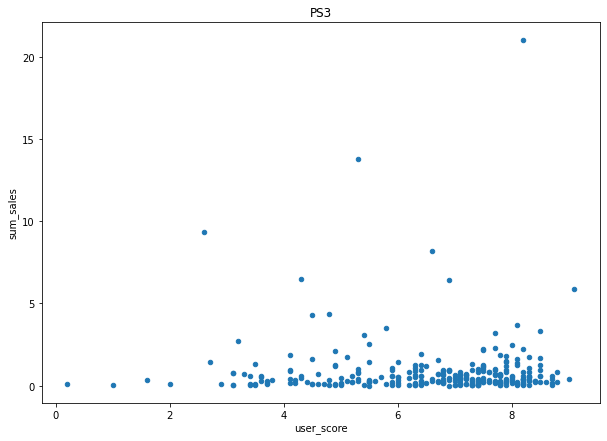

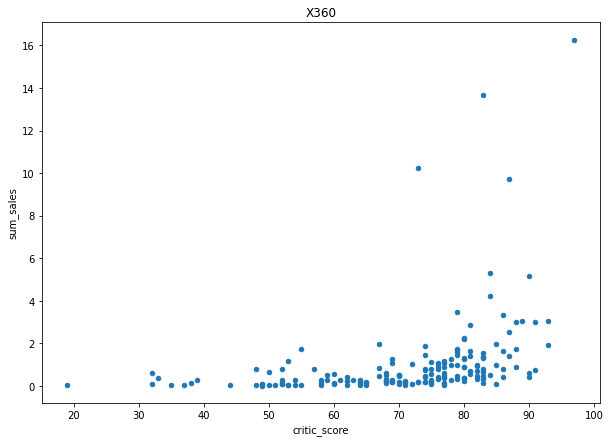

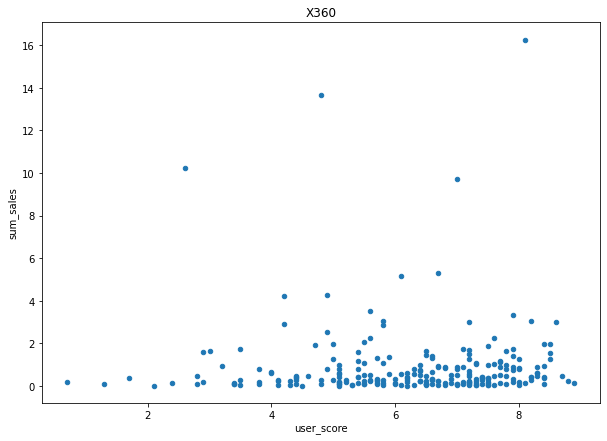

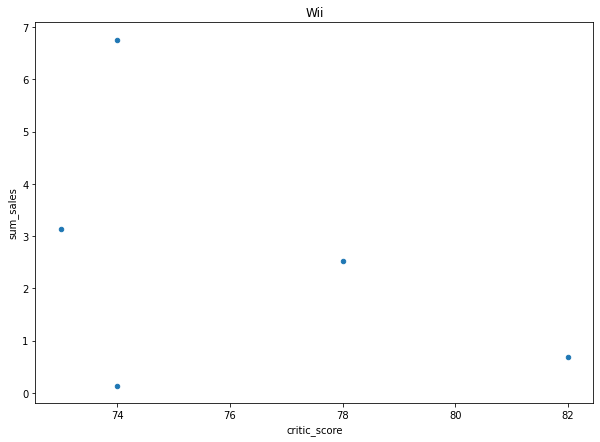

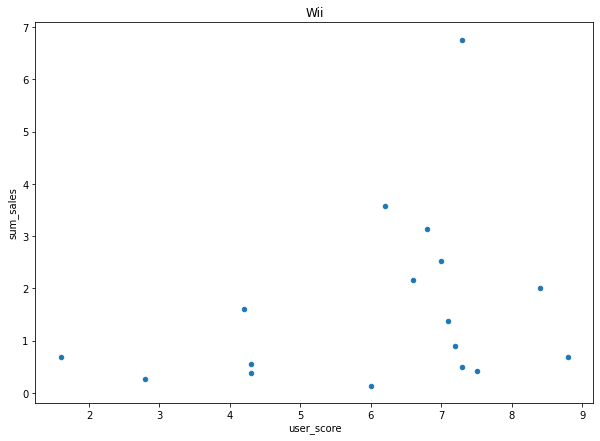

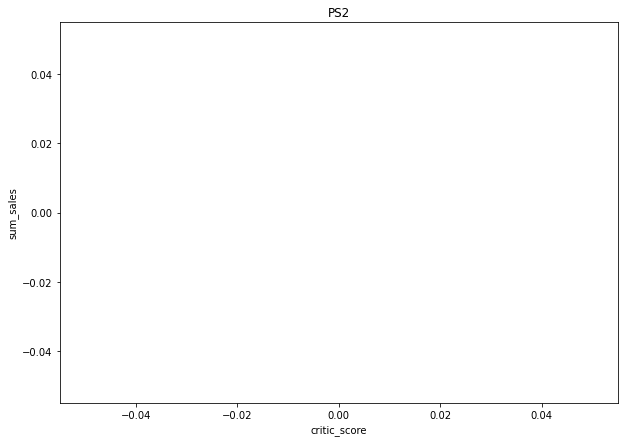

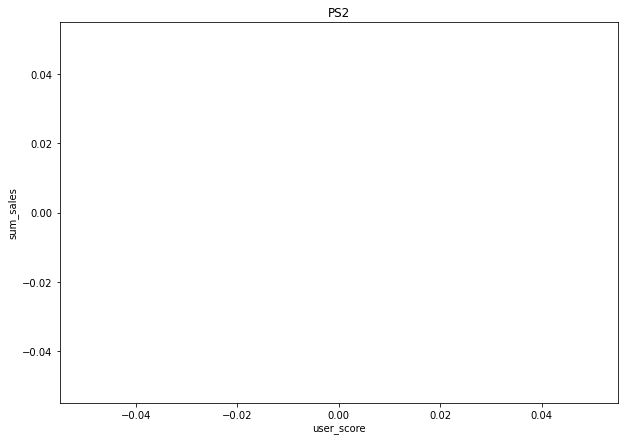

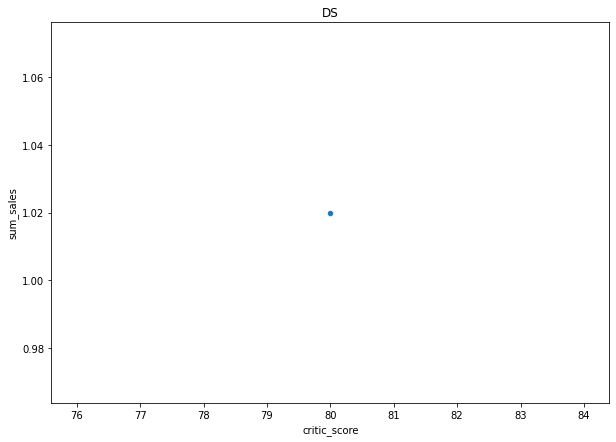

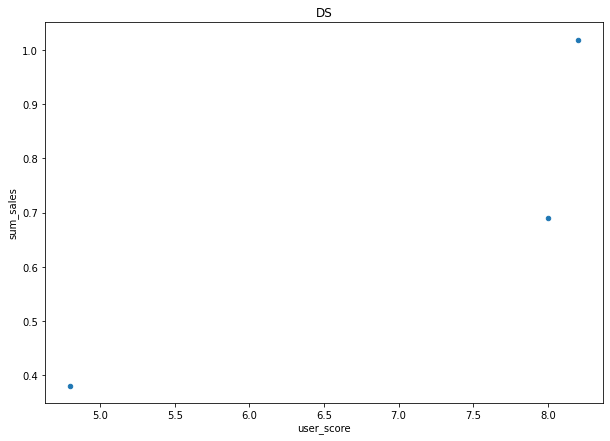

In [ ]:
for i in top_5:
    other_platform_matrix(i)

In [ ]:
for i in top_5:
    critic_score = data_top_5.query('@i in platform ')["critic_score"].corr(data_top_5["sum_sales"])
    user_score = data_top_5.query('@i in platform ')["user_score"].corr(data_top_5["sum_sales"])
    print(i)
    print("Корреляция для оценки критика:", critic_score)
    print("Корреляция для оценки пользователей:", user_score)

PS3
Корреляция для оценки критика: 0.3314972592629587
Корреляция для оценки пользователей: -0.005143522887113829
X360
Корреляция для оценки критика: 0.3605734888507336
Корреляция для оценки пользователей: 0.006163978646213329
Wii
Корреляция для оценки критика: -0.4243413011077494
Корреляция для оценки пользователей: 0.29619680007479526
PS2
Корреляция для оценки критика: nan
Корреляция для оценки пользователей: nan
DS
Корреляция для оценки критика: nan
Корреляция для оценки пользователей: 0.88270872757644


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Для всех платформ характерно то, что оценка критиков играет небольшую, прямопорциональную зависимость на продажи. Пользователи при покупке игр в большей степени ориентируются на оценку критиков, нежели на оценку других пользователей.

### Анализ жанров

Text(0, 0.5, 'Продажи')

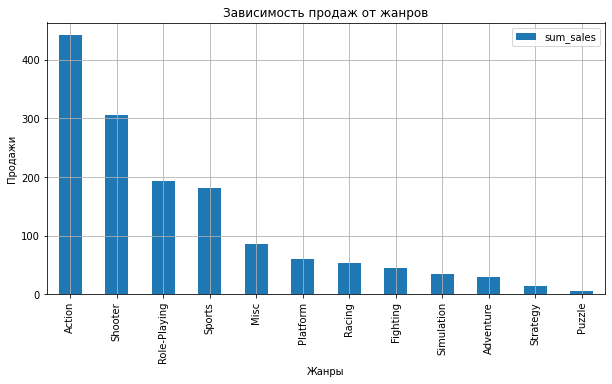

In [ ]:
data_genre = data.pivot_table(index = "genre", values = "sum_sales", aggfunc = "sum").sort_values(by="sum_sales", ascending = False) 
#создадим сводную таблицу, как самый простой способ
data_genre.plot(kind = "bar", grid = True, figsize = (10, 5)) #для наглядности
plt.title("Зависимость продаж от жанров")
plt.xlabel("Жанры")
plt.ylabel("Продажи")

Text(0, 0.5, 'Продажи')

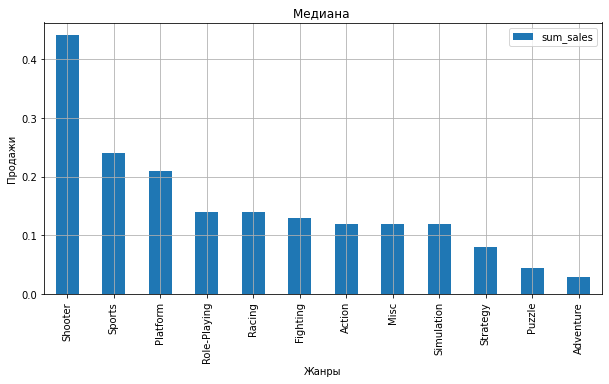

In [ ]:
data_genre = data.pivot_table(index = "genre", values = "sum_sales", aggfunc = "median").sort_values(by="sum_sales", ascending = False) 
#создадим сводную таблицу, как самый простой способ
data_genre.plot(kind = "bar", grid = True, figsize = (10, 5)) #для наглядности
plt.title("Медиана ")
plt.xlabel("Жанры")
plt.ylabel("Продажи")

* Самые продаваамые : Action, Sports, Shooter, Misc,Role-Playing
* Самые низкие продажи: Strategy, Puzzle, Adventure

* Таким образом, в настоящий момент мы определили жизненный цикл консолей, который равен примерно 10 лет. 

* Определили топ-5 по продажам консоль в настоящее время, предположили развитие и падение других консолей, так на смену PS3 приходит PS4, Xbox360 обновится до Xbox One.

* Пришли к выводу, что при покупке игр пользователи в большей степени ориентируются на оценку критиков, нежели пользовательскую оценку.

* Определили самые продаваемые жанры игр.
    

## Составте портрет пользователя каждого региона 

### Для NA

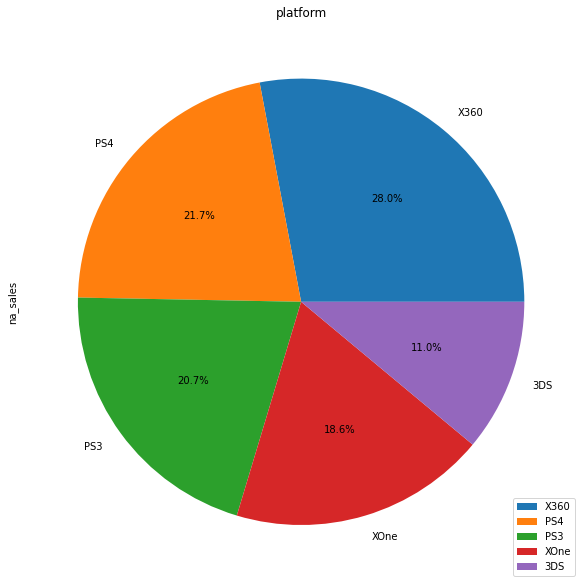

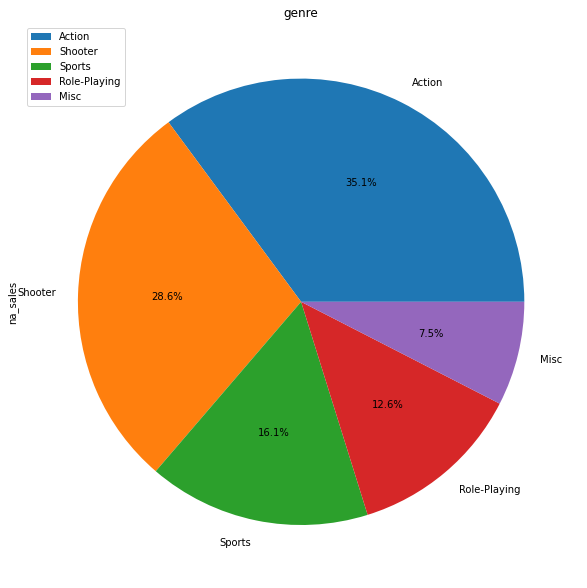

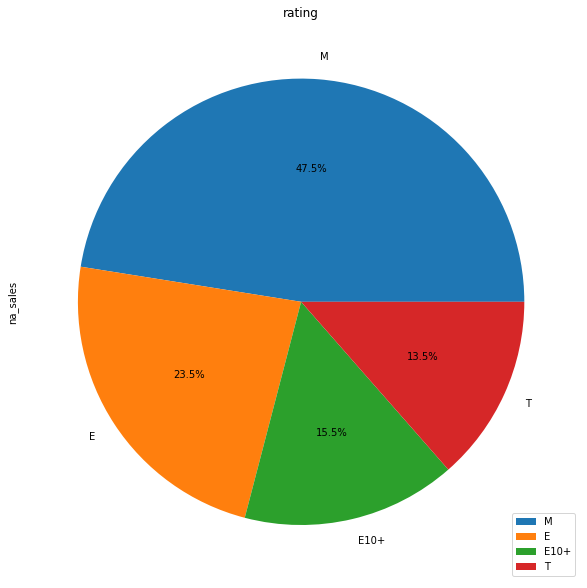

In [ ]:
target = ["platform","genre","rating"] #в остальном проще пройтись круговой диаграммой
for i in target:
    na_total = data.pivot_table(index = i, values = "na_sales", aggfunc ="sum").sort_values(by= "na_sales", ascending = False).head(5)
    na_total.plot(y= "na_sales", kind = "pie", figsize = (10,15), autopct='%1.1f%%')
    plt.title(i)

* Самые популярные платформы для Северной Америки: Xbox360, PS3, PS4, XOne, 3DS
* Самые популярные жанры: action, sport, shooter, misc
* Доля продаж для игр с рейтингом E, M - самые высокие


### Для EU

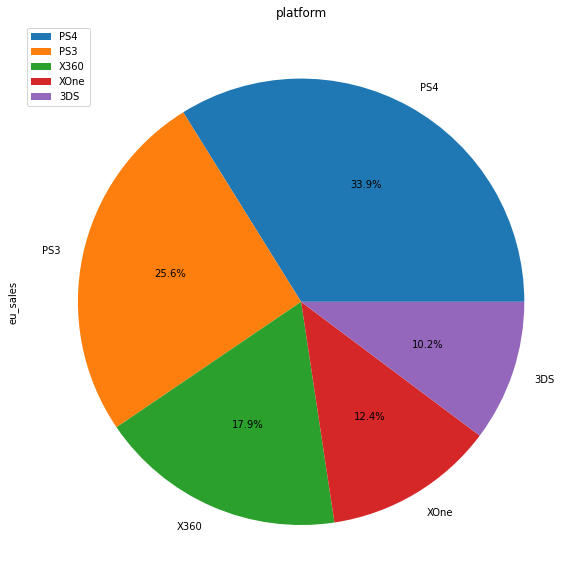

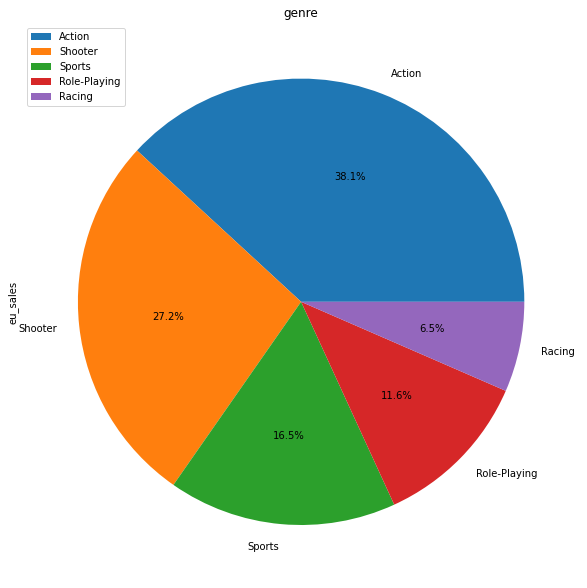

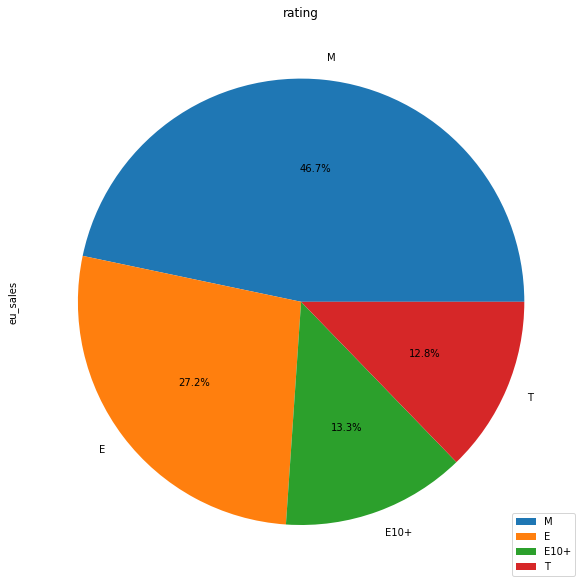

In [ ]:
target = ["platform","genre","rating"] 
for i in target:
    na_total = data.pivot_table(index = i, values = "eu_sales", aggfunc ="sum").sort_values(by= "eu_sales", ascending = False).head(5)
    na_total.plot(y= "eu_sales", kind = "pie", figsize = (10,15), autopct='%1.1f%%')
    plt.title(i)

* Самые популярные платформы для Европы: Xbox360, PS3, PS4, XOne, 3DS
* Самые популярные жанры: action, sport, shooter, role-paing, racing
* Доля продаж для игр с рейтингом E, M - самые высокие

### Для JP

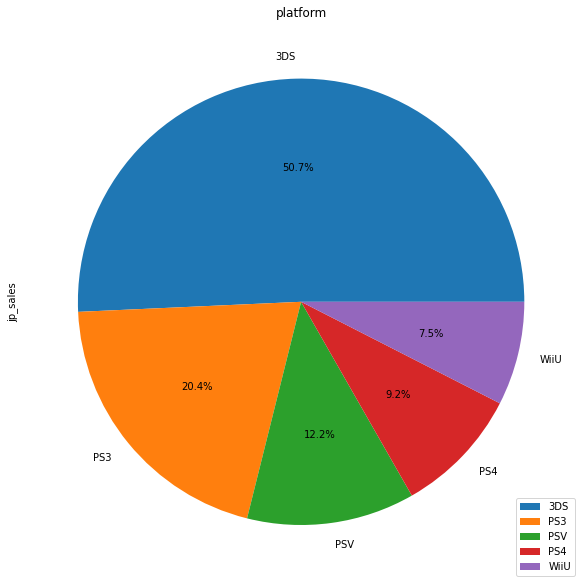

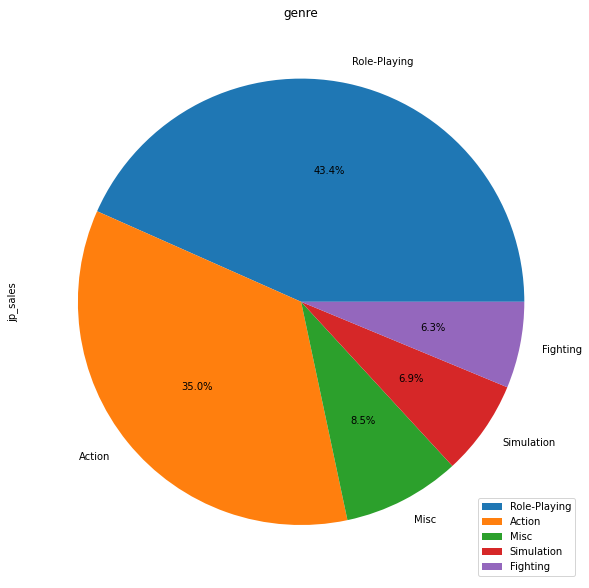

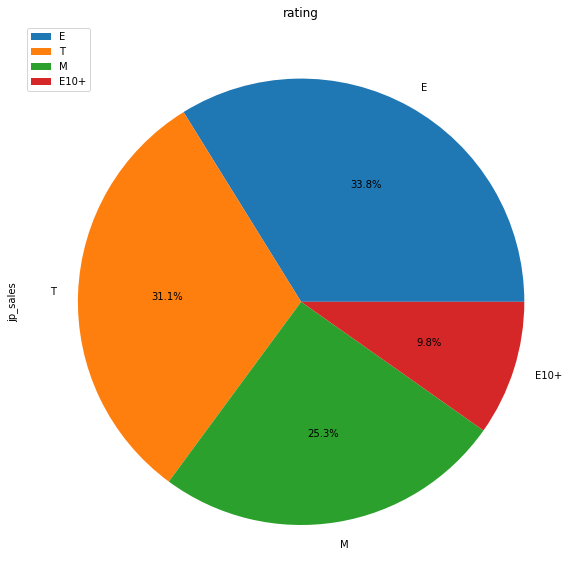

In [ ]:
target = ["platform","genre","rating"] 
for i in target:
    na_total = data.pivot_table(index = i, values = "jp_sales", aggfunc ="sum").sort_values(by= "jp_sales", ascending = False).head(5)
    na_total.plot(y= "jp_sales", kind = "pie", figsize = (10,15), autopct='%1.1f%%')
    plt.title(i)

* Самые популярные платформы для Азии: PS3, PS4, Wii, PSV, 3DS
* Самые популярные жанры: action, role-playing, simalation, misc, fithing
* Доля продаж для игр с рейтингом E, T - самые высокие

Хочу отметить, что лучше взять данные за последний год, потому что технологии быстро развиваются, а так же в 2017 году у меня уже была PS4, в которую я ооочень часто играл)

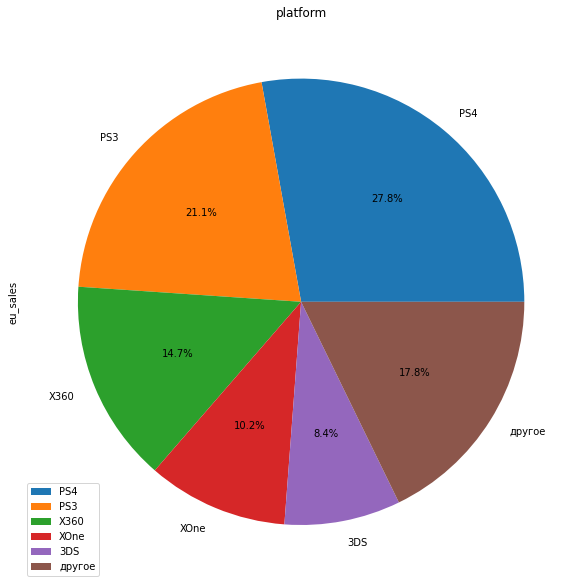

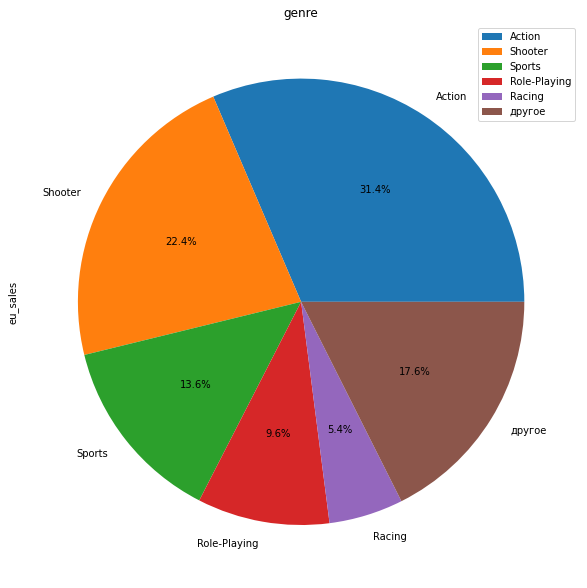

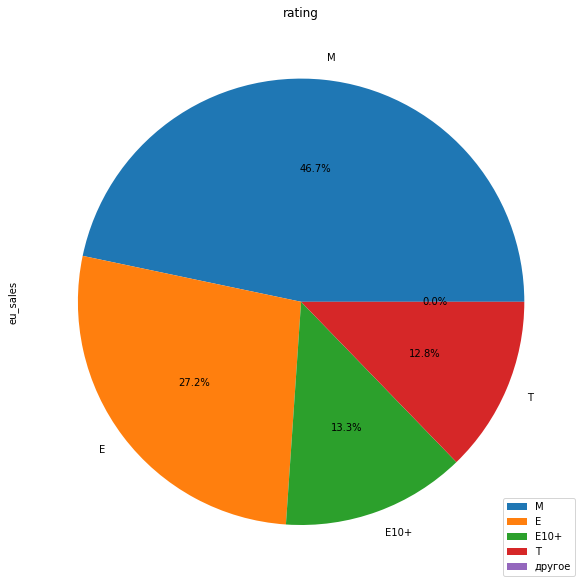

In [ ]:


target = ["platform","genre","rating"] 
for i in target:
    na_total = data.pivot_table(index = i, values = "eu_sales", aggfunc ="sum").sort_values(by= "eu_sales", ascending = False)
    na_total = pd.concat([na_total.head(5), pd.DataFrame(index=['другое'], columns=['eu_sales'], data=na_total.tail(-5)['eu_sales'].sum())])
    na_total.plot(y= "eu_sales", kind = "pie", figsize = (10,15), autopct='%1.1f%%')
    plt.title(i)

### NA.1

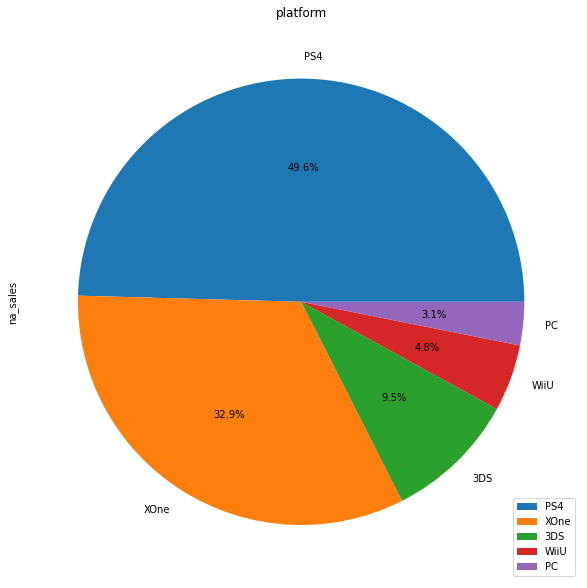

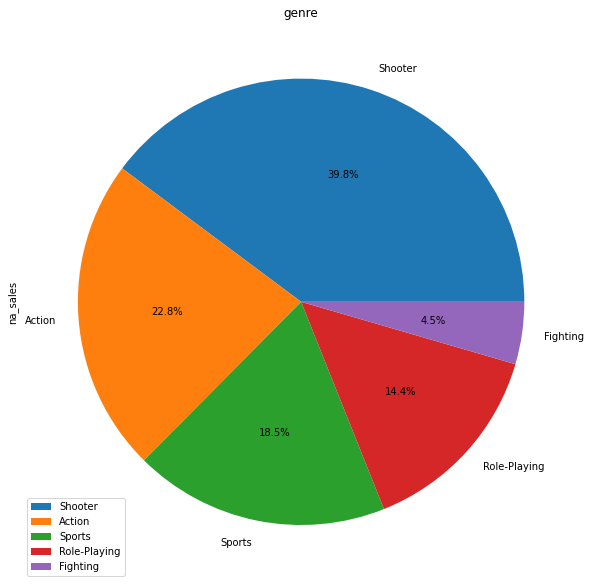

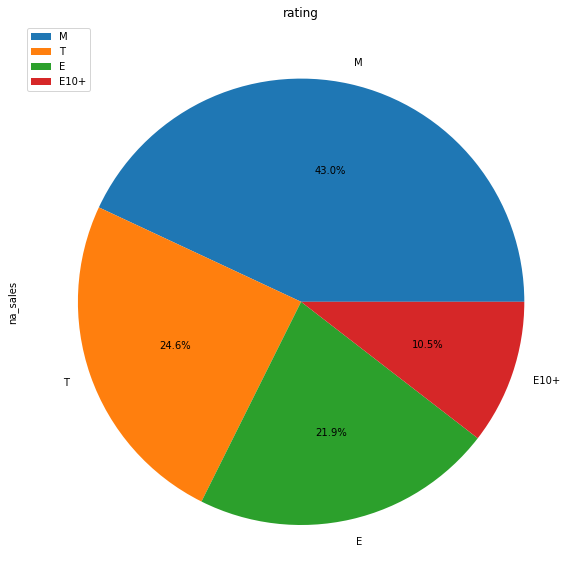

In [ ]:
target = ["platform","genre","rating"] #в остальном проще пройтись круговой диаграммой
data_new = data.query("year_of_release == 2016")
for i in target:
    na_total = data_new.pivot_table(index = i, values = "na_sales", aggfunc ="sum").sort_values(by= "na_sales", ascending = False).head(5)
    na_total.plot(y= "na_sales", kind = "pie", figsize = (10,15), autopct='%1.1f%%')
    plt.title(i)

### EU.1

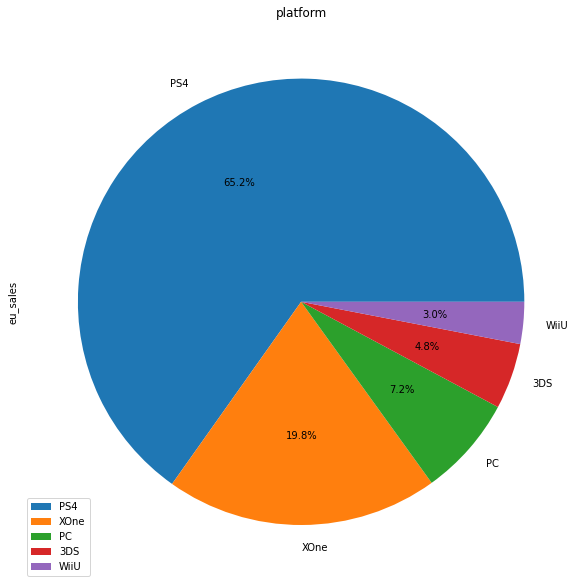

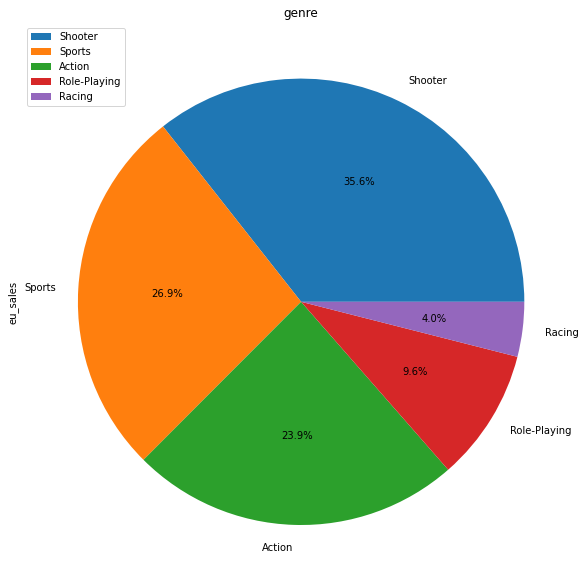

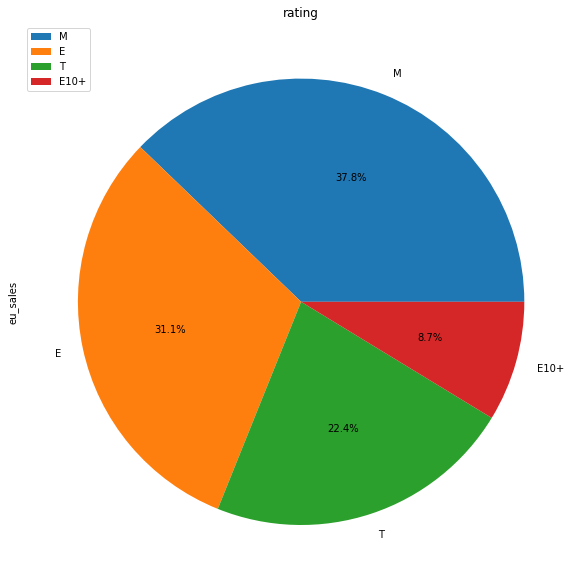

In [ ]:
target = ["platform","genre","rating"]
data_new = data.query("year_of_release == 2016")
for i in target:
    na_total = data_new.pivot_table(index = i, values = "eu_sales", aggfunc ="sum").sort_values(by= "eu_sales", ascending = False).head(5)
    na_total.plot(y= "eu_sales", kind = "pie", figsize = (10,15), autopct='%1.1f%%')
    plt.title(i)

### JP.1

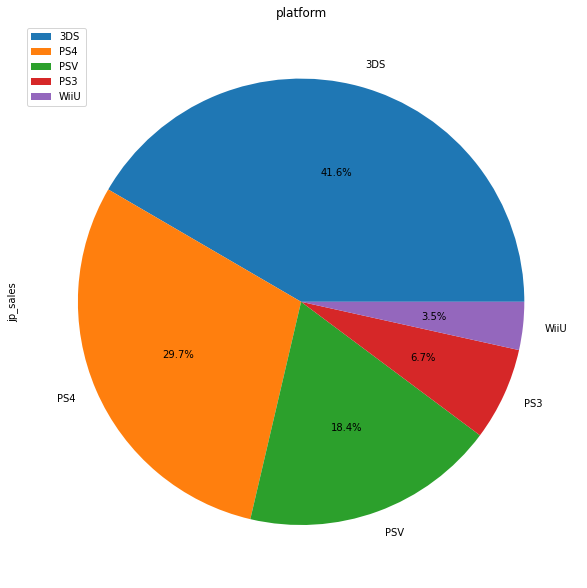

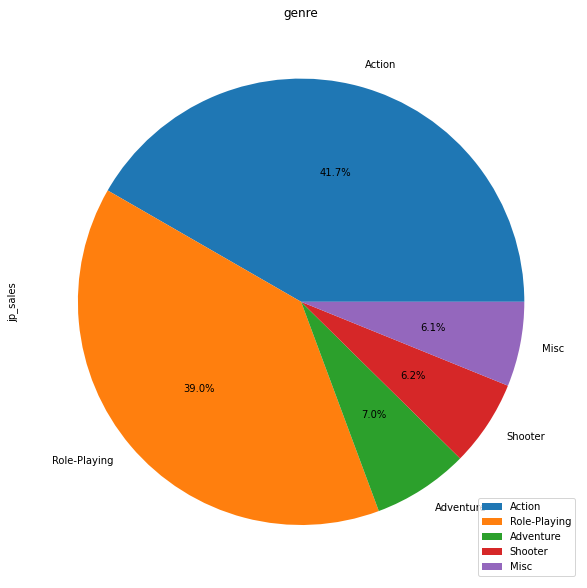

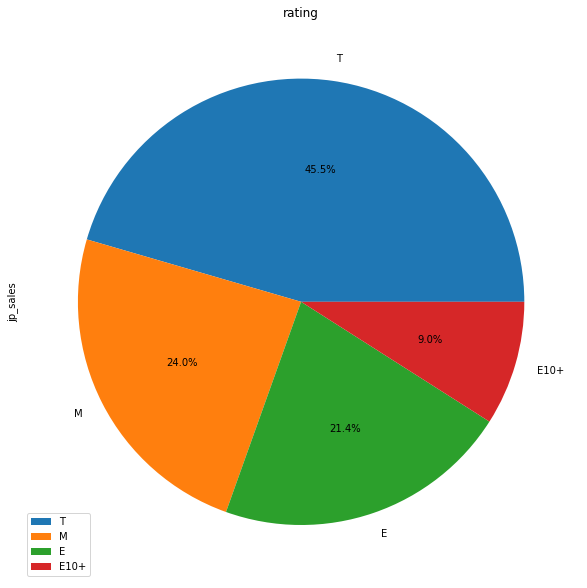

In [ ]:
target = ["platform","genre","rating"] #в остальном проще пройтись круговой диаграммой
data_new = data.query("year_of_release == 2016")
for i in target:
    na_total = data_new.pivot_table(index = i, values = "jp_sales", aggfunc ="sum").sort_values(by= "jp_sales", ascending = False).head(5)
    na_total.plot(y= "jp_sales", kind = "pie", figsize = (10,15), autopct='%1.1f%%')
    plt.title(i)

Вывод будем делать опираяюь на последний год, потому что результаты диаграмм различаются очевидно, а так же платформы развиваются с 2014 года по настоящее время очень стремительно.
* За последний год в Северной Америке: Xbox One, PS4 и небольшую долю рынка забрала 3DS. Самые популярные жанры :Если брать данные за последний год: Shooter, Action, Sports. Топ Рейтингов игр: M, E, T.
* В Европе : топ игровых платформ : PS4, Xone, PC. Топ жанров: Shooter, Sports, Action. Топ рейтингов: M,E,T
* В Японии: топ игровых платформ : 3DS, PS4, PSV. п жанров: Action, Role-playing, Adventure. Топ рейтингов: T, E, M.


## Проверяем гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1 - Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [ ]:
x_score_users = data.query('platform == "XOne"').user_score.mean() #расчитаем для xbox
print("Пользовательская оценка Xbox", x_score_users)
pc_score_users = data.query('platform == "PC"').user_score.mean() #расчитаем для компов
print("Пользовательская оценка PC", pc_score_users)

Пользовательская оценка Xbox 6.521428571428572
Пользовательская оценка PC 6.428640776699029


In [ ]:
alpha = 0.01
data_xone = data.query('platform == "XOne"')["user_score"].dropna()
data_pc = data.query('platform == "PC"')["user_score"].dropna()
print("Значение pvalue для двух выборк:", st.stats.ttest_ind(data_xone, data_pc).pvalue)
if st.stats.ttest_ind(data_xone, data_pc).pvalue > alpha:
    print("Альтернативная гипотеза отвергается, нулевую гипотезу не отвергаем")
else:
    print("Нулевая гипотеза отвергается")

Значение pvalue для двух выборк: 0.5535080500643661
Альтернативная гипотеза отвергается, нулевую гипотезу не отвергаем


Значение pvalue чуть больше параметра alpha, следовательно отвергаем альтернативную гипотезу , следовательно средние рейтинги двух платформ возможно получить равными.

### Средние пользовательские рейтинги жанров Action  и Sports разные.

H0 - Средние пользовательские рейтинги жанров Action и Sports равны.

H1 - Средние пользовательские рейтинги жанров Action и Sports не равны.

<div class="alert alert-danger"; style="border-left: 7px solid red">
<h3>👀 Комментарий ревьюера</h3>
    
Нулевая гипотеза **всегда** формулируется в терминах равенства, потому что для нулевой гипотезы мы в таком случае будем знать вид распределения
</div>    


In [ ]:
action_score_users = data.query('genre == "Action"').user_score.mean() #расчитаем для action
print("Пользовательская оценка Action", action_score_users)
sports_score_users = data.query('genre == "Sports"').user_score.mean() #расчитаем для sport
print("Пользовательская оценка Sports", sports_score_users)

Пользовательская оценка Action 6.825047801147227
Пользовательская оценка Sports 5.455897435897437


In [ ]:
alpha = 0.01
data_action = data.query('genre == "Action"')["user_score"].dropna()
data_sport = data.query('genre == "Sports"')["user_score"].dropna()
print("Значение pvalue для двух выборк:", st.stats.ttest_ind(data_action, data_sport).pvalue)
if st.stats.ttest_ind(data_action, data_sport).pvalue > alpha:
    print("Альтернативная гипотеза отвергается, нулевая подтверждается")
else:
    print("Нулевая гипотеза отвергается, альтернативная подтверждается")

Значение pvalue для двух выборк: 3.7163089460934874e-26
Нулевая гипотеза отвергается, альтернативная подтверждается


Следовательно, средние рейтинги не могут быть равны.

## Общий вывод

Таким образом, в рамках проекта, мы произвели подготовку данных, провели исследовательский анализ рынка, в рамках которого выделили платформы будущего, выделили жизненный цикл платформ, провели анализ различных рынков. Выделили факторы, влияющие на рынок. Проверили две гипотезы, которые доказывают, что средние рейтинги двух платформ с малой вероятностью будут одинаковые, а так же средние пользовательские рейтинги получить тоже маловероятно.
Так разработчикам стоит начинать делать игры для ps4 в северной америке и в европе, 

In [ ]:
(26 ** 2 + 220 ** 2 + 99*2) / 4 

12318.5